In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os
import datetime as dt
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

from sktime.forecasting.base import ForecastingHorizon
from sktime.transformations.series.detrend import Detrender,Deseasonalizer
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sktime.forecasting.compose import TransformedTargetForecaster,make_reduction
from sktime.forecasting.arima import AutoARIMA

import numpy as np

In [19]:
os.getcwd()

'/USER/Taeyun/Traffic_TimeSeires'

# Date Load

In [41]:
def load_data_csv(datapath):
    data = pd.read_csv(datapath)
    
    print(f"{datapath.split('/')[-1]} ||Shape :", data.shape)
    return data


train_df = load_data_csv(os.path.join(os.getcwd(),'EDA_train.csv'))
valid_df = load_data_csv(os.path.join(os.getcwd(),'EDA_valid.csv'))
test_df = load_data_csv(os.path.join(os.getcwd(),'EDA_test.csv'))
highways = train_df.columns[2:-1]

EDA_train.csv ||Shape : (3312, 38)
EDA_valid.csv ||Shape : (336, 38)
EDA_test.csv ||Shape : (336, 38)


In [28]:
train10 = Train_by_road['10']
valid10 = Valid_by_road['10']

In [50]:
road10_agg_train = train_df.loc[:,['날짜','10']].groupby('날짜').sum()
road10_agg_train.index = pd.to_datetime(road10_agg_train.index,format='%Y%m%d')

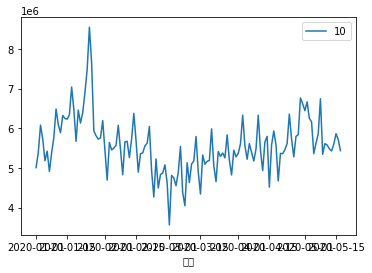

In [47]:
sns.lineplot(data=road10_agg_train)
plt.show()

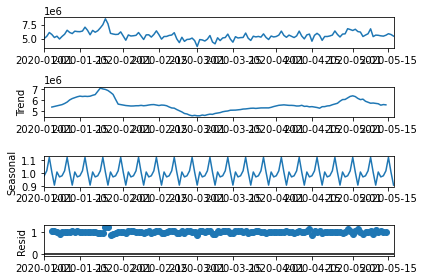

In [54]:
seasonal_decompose(road10_agg_train,model='multiplicative').plot()
plt.show()

In [51]:
road10_agg_val = valid_df.loc[:,['날짜','10']].groupby('날짜').sum()
road10_agg_val.index = pd.to_datetime(road10_agg_val.index,format='%Y%m%d')

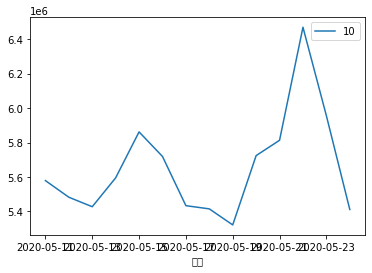

In [52]:
sns.lineplot(data=road10_agg_val)
plt.show()

In [61]:
deseasonalizer = Deseasonalizer(model = 'multiplicative',sp=12)
plot_series(deseasonalizer.fit_transform(road10_agg_val))

ValueError: x must have 2 complete cycles requires 24 observations. x only has 14 observation(s)

In [60]:
regressor = lgb.LGBMRegressor()
forecaster = make_reduction(regressor)

In [ ]:
train_df['날짜'] = train_df['날짜'].astype('string')
train_df['시간'] = train_df['시간'].astype('string')
train_df['date'] = train_df['날짜']+train_df['시간']
train_df['date'] = pd.to_datetime(train_df['date'],format='%Y%m%d%H')
train_df =train_df.drop(labels=['날짜','시간'],axis=1)